# 개요

## 전처리란?

**`전처리`**
: 데이터를 분석의 목적에 맞게 가공하는 일련의 작업 과정
- Forbes에서 인용한 CrowdFlower의 설문 결과에 따르면 데이터 분석가는 업무 시간 중 80% 정도를 데이터 수집 및 전처리 과정에 사용한다고 합니다.

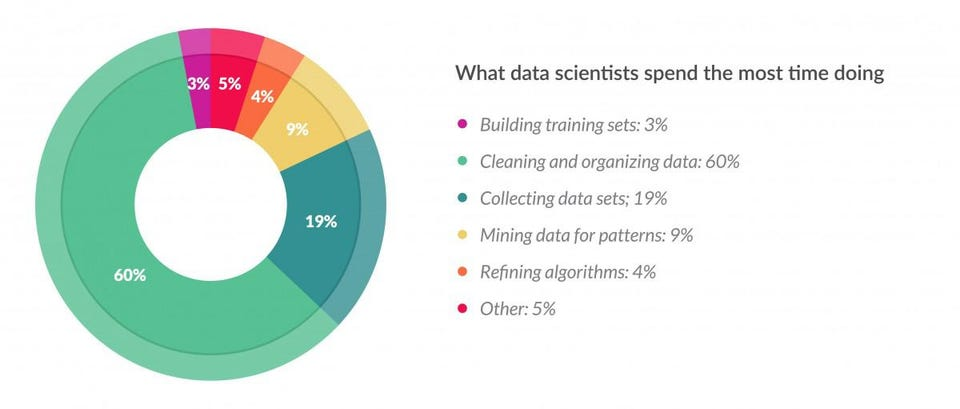

   - 데이터 전처리는 보통 다음의 순서로 진행합니다.
       - **`데이터 셋 확인`** => **`결측값 처리`** => **`이상값 처리`** => **`Feature Engineering`**

        - feature engineering이란? 
        - domain knowledge를 이용해 특징을 추출하는 것. 
        - 예를 들어, PCA, Feature selection 등등...

# `단계 1` - **데이터 셋 확인**
- 분석하고자 하는 데이터 셋과 친해지는 단계입니다. 데이터 셋에 대해 아래 두 가지 확인 작업을 하게 됩니다.<br><br>
 - **변수확인**
 - **RAW 데이터 확인**
 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# 중고 자동차 데이터 셋 불러오기
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df = pd.read_csv(filename, names = headers)

In [3]:
# info를 통해 데이터 프레임에 대한 개괄적인 정보확인(결측치와 데이터 타입, 변수 확인)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
print(df.isnull().sum())

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [ ]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [ ]:
# 만약 전체 columns을 보고 싶다면 pandas에서 옵션을 수정한다

pd.set_option('display.max_columns', None)
display(df)
pd.set_option('display.max_columns', 20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [ ]:
df.value_counts().to_frame()

0
symboling normalized-losses make          fuel-type aspiration num-of-doors body-style  drive-wheels engine-location wheel-base length width height curb-weight engine-type num-of-cylinders engine-size fuel-system bore stroke compression-ratio horsepower peak-rpm city-mpg highway-mpg price   
-2        103               volvo         gas       std        four         sedan       rwd          front           104.3      188.8  67.2  56.2   2912        ohc         four             141         mpfi        3.78 3.15   9.5               114        5400     23       28          12940  1
 1        ?                 bmw           gas       std        four         sedan       rwd          front           103.5      189.0  66.9  55.7   3055        ohc         six              164         mpfi        3.31 3.19   9.0               121        4250     20       25          24565  1
          168               toyota        gas       std        two          hatchback   rwd          front           94.5       168.7  64.0  52.6   2300        dohc        four             98          mpfi        3.24 3.08   9.4               112        6600     26       29          9538   1
                                                                            sedan       rwd          front           94.5       168.7  64.0  52.6   2169        ohc         four             98          2bbl        3.19 3.03   9.0               70         4800     29       34          8058   1
                                                                                                                                                    2265        dohc        four             98          mpfi        3.24 3.08   9.4               112        6600     26       29          9298   1
...                                                                                                                                                                                                                                                                                               ..
 0        91                toyota        gas       std        four         wagon       4wd          front           95.7       169.7  63.6  59.1   3110        ohc         four             92          2bbl        3.05 3.03   9.0               62         4800     27       32          8778   1
          93                mercedes-benz diesel    turbo      two          hardtop     rwd          front           106.7      187.5  70.3  54.9   3495        ohc         five             183         idi         3.58 3.64   21.5              123        4350     22       25          28176  1
          ?                 audi          gas       turbo      two          hatchback   4wd          front           99.5       178.2  67.9  52.0   3053        ohc         five             131         mpfi        3.13 3.40   7.0               160        5500     16       22          ?      1
                            bmw           gas       std        four         sedan       rwd          front           103.5      189.0  66.9  55.7   3230        ohc         six              209         mpfi        3.62 3.39   8.0               182        5400     16       22          30760  1
 3        ?                 volkswagen    gas       std        two          convertible fwd          front           94.5       159.3  64.2  55.6   2254        ohc         four             109         mpfi        3.19 3.40   8.5               90         5500     24       29          11595  1

[205 rows x 1 columns]

In [ ]:
for i in df.columns:
    print(df[i].value_counts())
    print('----------------------------------------------')

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
----------------------------------------------
?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64
----------------------------------------------
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plym

In [5]:
for i in df.columns:
    print(i,df[i].unique())
    print('----------------------------------------------')

symboling [ 3  1  2  0 -1 -2]
----------------------------------------------
normalized-losses ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
----------------------------------------------
make ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
----------------------------------------------
fuel-type ['gas' 'diesel']
----------------------------------------------
aspiration ['std' 'turbo']
----------------------------------------------
num-of-doors ['two' 'four' '?']
----------------------------------------------
body-style ['convertible' 'hatchback' 'sedan' 'wagon' 'hard

In [ ]:
# "?" 를 NaN 값으로 대체한다. 
df.replace("?", np.nan, inplace = True)
display(df.head())
display(df.isnull().sum())

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [ ]:
# describe 함수: 데이터의 개수(count), 평균(mean), 표준편차(std), 분위수(25,50,75%), 최대최소(max,min)를 보여줌
# 기본 수치 기술통계량 확인 가능 
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


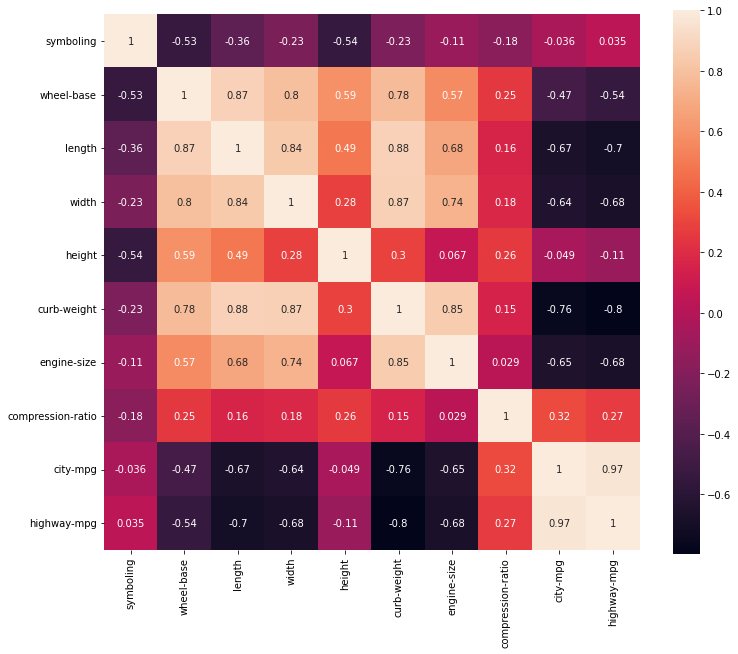

In [ ]:
# 변수간 상관관계 확인
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(),square = True, annot = True)

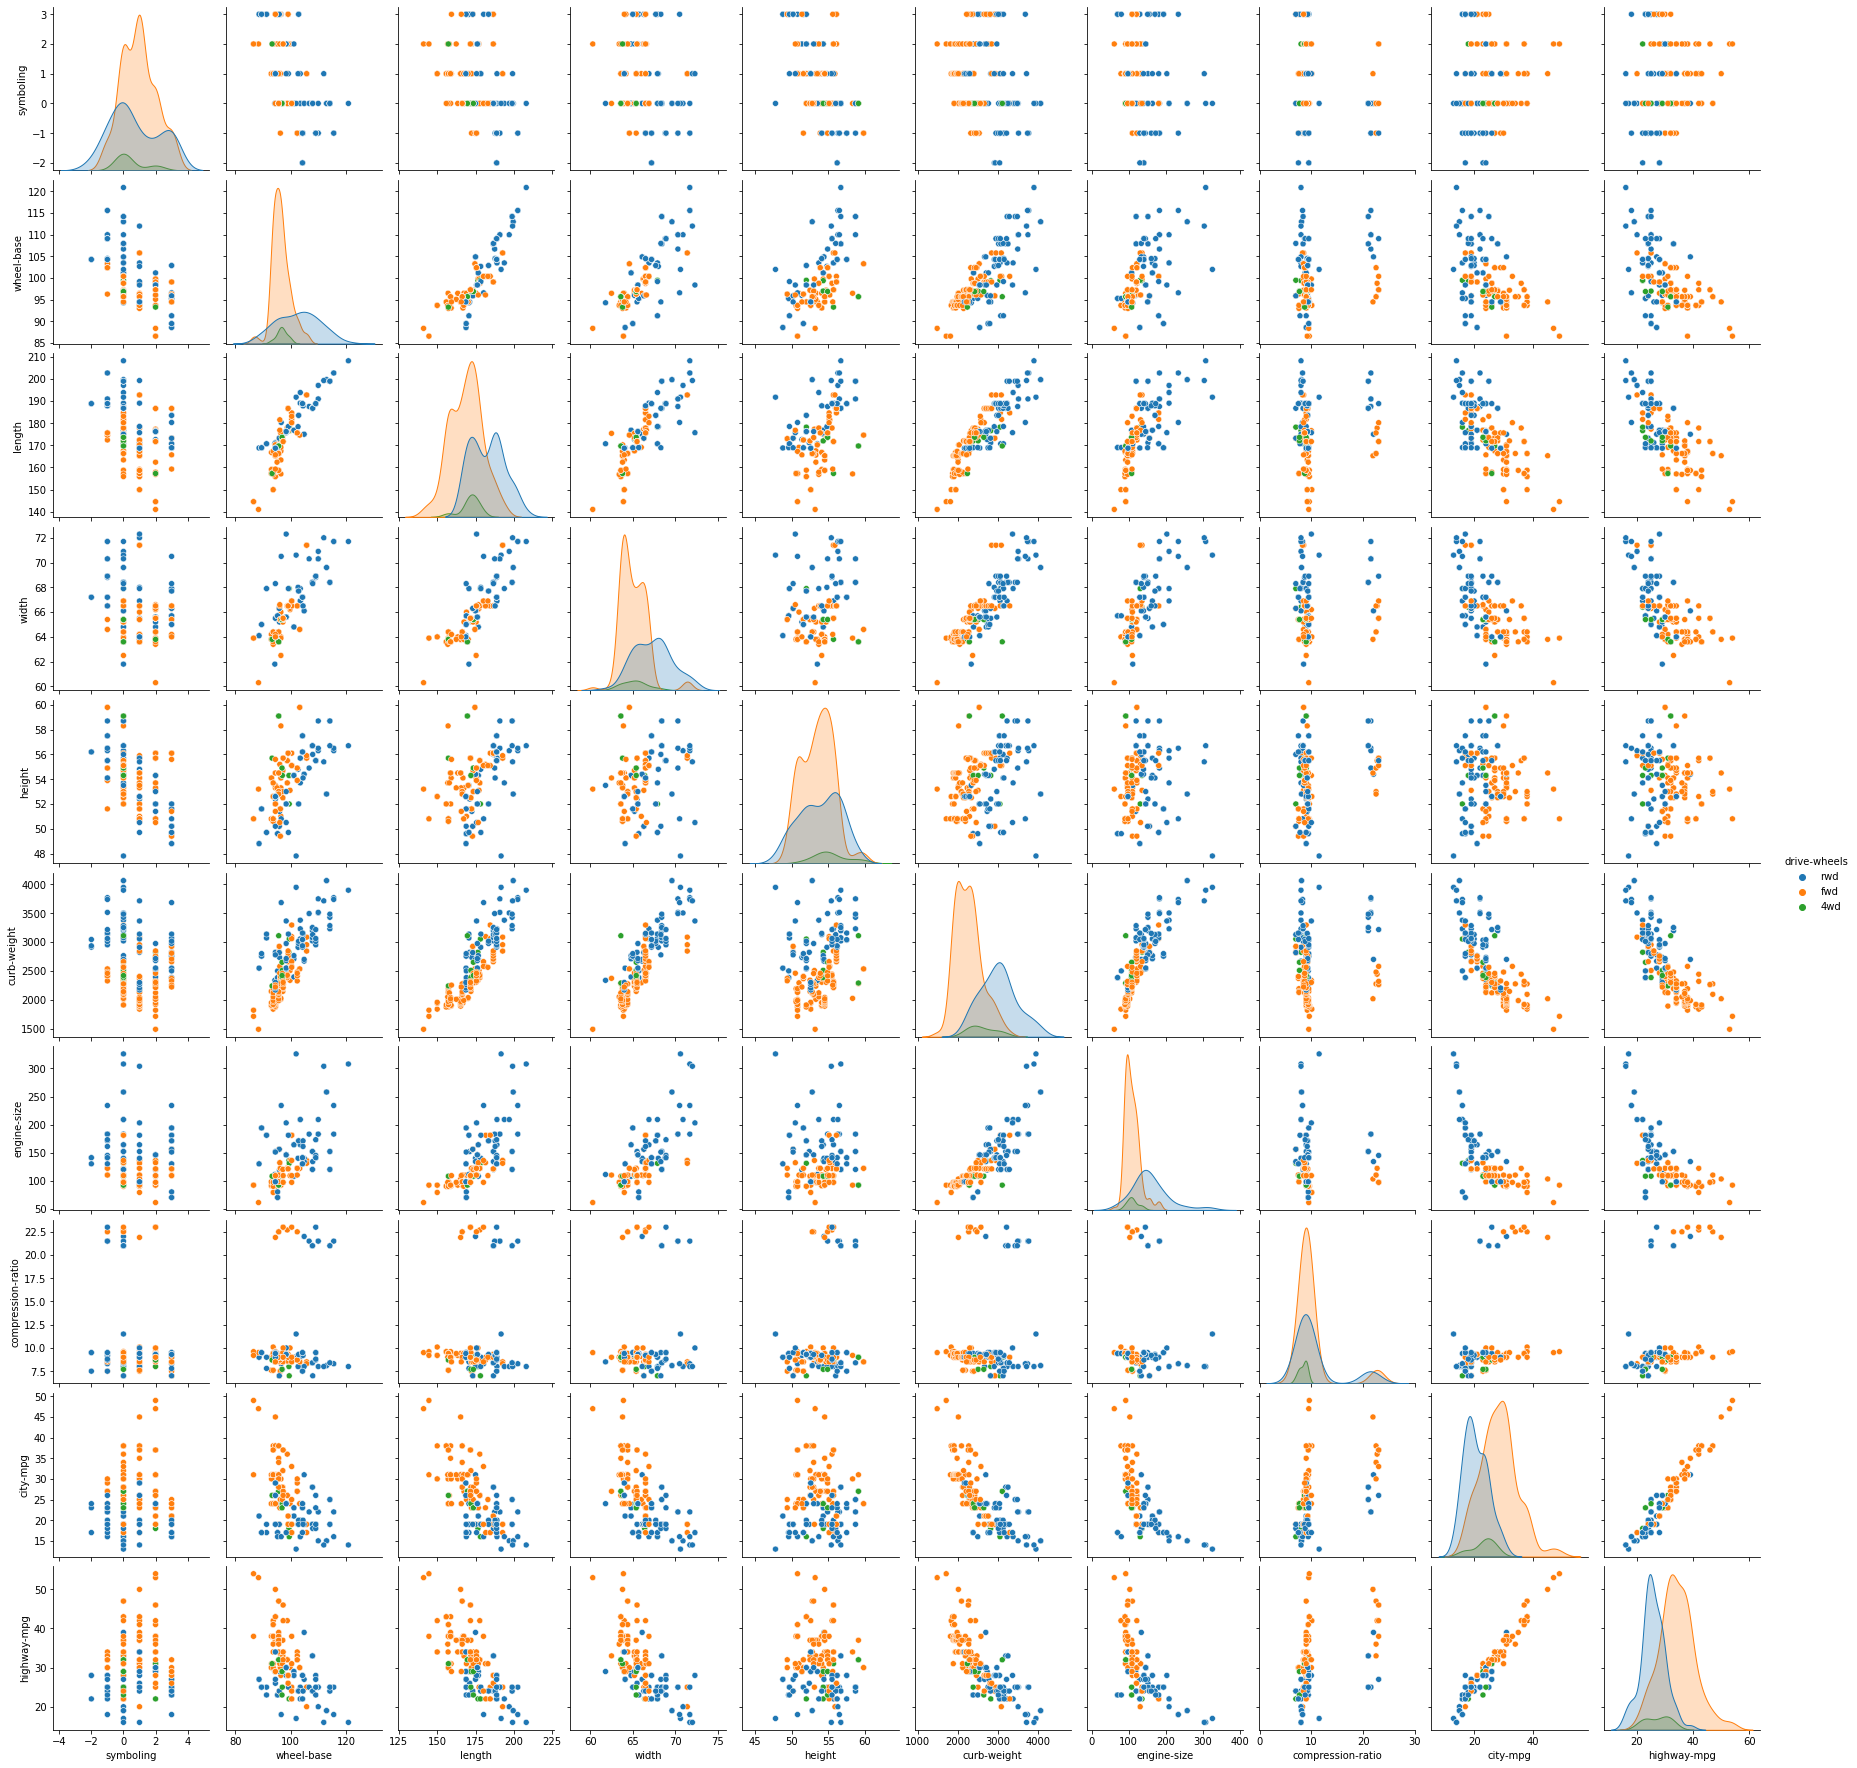

In [ ]:
# hue를 통해 비교하고 싶은 값도 지정할 수 있다
sns.pairplot(df, hue = 'drive-wheels')

# `단계 2` - **결측값 처리**

## 삭제

- 1) 결측값이 발생한 모든 관측치를 삭제하거나 (**전체 삭제**, Listwise Deletion),<br> 2) 데이터 중 모델에 포함시킬 변수들 중 결측값이 발생한 모든 관측치를 삭제하는 방법(**부분 삭제**)이 있습니다.<br><br>
- **전체 삭제**는 간편한 반면 관측치가 줄어들어 모델의 **유효성**이 낮아질 수 있고,<br> **부분 삭제**는 모델에 따라 변수가 제각각 다르기 때문에 **관리 Cost**가 늘어난다는 단점이 있습니다. <br><br>
- 삭제는 결측값이 **무작위**로 발생한 경우에 사용합니다. 
    - 결측값이 무작위로 발생한 것이 아닌데 관측치를 삭제한 데이터를 사용할 경우 왜곡된 모델이 생성될 수 있습니다.


In [ ]:
df_1 = df.copy()
df_1.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [ ]:
# NaN값을 가진 로우 삭제하기

# dropna(how='any') : 하나의 데이터라도 결측값이면 행을 삭제
len_before = len(df_1)

# horsepower column의 결측치가 1개라도 있으면, 해당하는 row를 삭제
len_after = len(df_1.dropna(subset=["horsepower"], 
                            how='any', 
                            axis=0))

print('전체 행의 개수:',len_before)
print('사라지는 행의 개수:',len_before-len_after)
print('남는 행의 개수:',len_after) 


# horsepower", "stroke" 컬럼에 값이 없는 레코드를 삭제한다.
df_1.dropna(subset=["horsepower","stroke"],
            how='any', 
            axis=0, 
            inplace=True)

# 레코드를 삭제했기 때문에 인덱스를 리셋한다. 
df_1.reset_index(drop=True, inplace=True)
display(df_1.head())
print(len(df_1))

전체 행의 개수: 205
사라지는 행의 개수: 2
남는 행의 개수: 203


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


199


In [ ]:
# horsepower와 stroke 모두 결측치가 있는 row는 없다.
# 따라서 dropna(how = 'all')로 했을 때, 삭제된 row가 없다

len_before = len(df)
len_after = len(df.dropna(subset=["horsepower","stroke"], how='all', axis=0))

print('전체 행의 개수:',len_before)
print('사라지는 행의 개수:',len_before - len_after)
print('남는 행의 개수:',len_after) 

전체 행의 개수: 205
사라지는 행의 개수: 0
남는 행의 개수: 205



## 다른 값으로 대체 (평균, 최빈값, 중간값)

- 결측값이 발생한 경우 다른 관측치의 평균, 최빈값, 중간값 등으로 대체할 수 있습니다.<br><br>
- 1) 모든 관측치의 평균값 등으로 대체하는 **일괄 대체 방법**<br> 2) 범주형 변수를 활용해 유사한 유형의 평균값 등으로 대체하는 **유사 유형 대체 방법**이 있습니다. 
    - (예 – 남자 키의 평균 값 173, 여자 키의 평균 값 158인 경우, 남자 관측치의 결측 값은 173으로 대체)<br><br>
- 결측값의 발생이 다른 변수와 관계가 있는 경우 대체 방법이 유용한 측면은 있지만, 유사 유형 대체 방법의 경우 어떤 범주형 변수를 유사한 유형으로 선택할 것인지는 자의적으로 선택하므로 모델이 왜곡될 가능성이 존재합니다.

In [ ]:
idx = df_1[df_1['normalized-losses'].isnull()].index
df_1.loc[idx].head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN
14,1,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880


In [ ]:
# index 추출 예시
# 조건문을 통해 True False를 뽑아낸 뒤, 데이터프레임에 이를 적용해 index를 뽑아낸다
print(df_1['symboling'] > 2)

# df_1['normalized-losses'].isnull() 또한 같은 원리다
print('-------------------------------------------')
print(df_1['normalized-losses'].isnull())

0       True
1       True
2      False
3      False
4      False
       ...  
194    False
195    False
196    False
197    False
198    False
Name: symboling, Length: 199, dtype: bool
-------------------------------------------
0       True
1       True
2       True
3      False
4      False
       ...  
194    False
195    False
196    False
197    False
198    False
Name: normalized-losses, Length: 199, dtype: bool


In [ ]:
# 평균 값으로 결측치 대체
print(df[['normalized-losses']].info(),'\n\n')
print(df[['normalized-losses']].astype("float").info())

# print(df['normalized-losses'].mean())
avg_norm_loss = df['normalized-losses'].astype("float").mean()
print(f'\n\n대체할 평균 값은: {avg_norm_loss} 입니다')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   normalized-losses  164 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB
None 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB
None


대체할 평균 값은: 122.0 입니다


In [ ]:
# fillna 로 결측치 입력
df_1['normalized-losses'] = df_1['normalized-losses'].fillna(avg_norm_loss)

df_1.loc[idx].head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
9,0,122.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN
14,1,122.0,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,122.0,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,122.0,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,122.0,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880


In [ ]:
# price 값을 각 make 별 평균으로 대체
check_index = df_1[df_1['price'].isnull()].index
display(df_1[['make','price']].loc[check_index])

,make,price
9,audi,NaN
44,isuzu,NaN
45,isuzu,NaN
125,porsche,NaN


In [ ]:
df_1['price'] = df_1['price'].astype("float")
df_1_make_avg = df_1.groupby("make")['price'].transform("mean")
df_1['price'].fillna(df_1_make_avg, inplace=True)

print(df_1_make_avg)
display(df_1[['make','price']].loc[check_index])

0      15498.333333
1      15498.333333
2      15498.333333
3      17859.166667
4      17859.166667
           ...     
194    18063.181818
195    18063.181818
196    18063.181818
197    18063.181818
198    18063.181818
Name: price, Length: 199, dtype: float64


,make,price
9,audi,17859.166667
44,isuzu,8916.500000
45,isuzu,8916.500000
125,porsche,31400.500000


## 실습1

In [3]:
np.random.seed(123)
ex_1 = pd.DataFrame({"col_1": np.random.randn(7),
                     "col_2": np.random.randn(7)})
ex_1.loc[8] = np.nan
ex_1

,col_1,col_2
0,-1.085631,-0.428913
1,0.997345,1.265936
2,0.282978,-0.866740
3,-1.506295,-0.678886
4,-0.578600,-0.094709
5,1.651437,1.491390
6,-2.426679,-0.638902
8,NaN,NaN


In [7]:
# ex_1에서 col_1, col_2의 결측치를 각 칼럼의 평균으로 채우기



col_1_make_avg = ex_1['col_1'].mean
col_2_make_avg = ex_1['col_2'].mean()
ex_1['col_1'].fillna(col_1_make_avg, inplace=True)
ex_1['col_2'].fillna(col_2_make_avg, inplace=True)

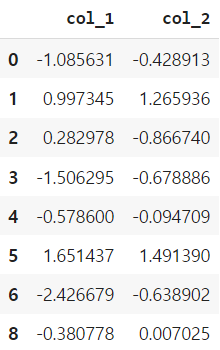

## 실습2

In [15]:
raw_data = {'first_name': ['Jason','Tina', 'Jake', 'Amy'],
            'last_name': ['Miller','Ali', 'Milner', 'Cooze'],
            'age': [42,36, 24, 73],
            'sex': ['m','f', 'm', 'f'],
            'preTestScore': [4,np.nan, 2, 3],
            'postTestScore': [25,np.nan, 62, 70]}
df_ex2 = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore'])
df_ex2

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42,m,4.0,25.0
1,Tina,Ali,36,f,NaN,NaN
2,Jake,Milner,24,m,2.0,62.0
3,Amy,Cooze,73,f,3.0,70.0


In [18]:
# preTestScore의 결측치를 preTestScore의 전체 평균으로 채우기

preTestScore_avg = df_ex2['preTestScore'].mean()
df_ex2['preTestScore'].fillna(preTestScore_avg, inplace=True)

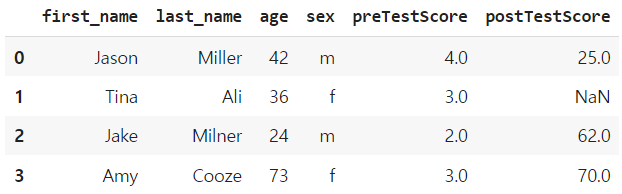

In [21]:
#postTestScore의 결측치를 성별별 평균으로 채우기

postTestScore_avg = df_ex2.groupby("sex")['postTestScore'].transform("mean")
df_ex2['postTestScore'].fillna(postTestScore_avg, inplace=True)

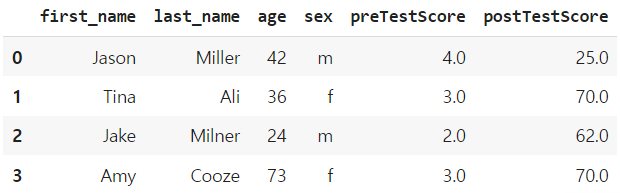

## 예측값 삽입

- 결측값이 없는 관측치를 트레이닝 데이터로 사용해서 결측값을 예측하는 모델을 만들고,<br>이 모델을 통해 결측값이 있는 관측 데이터의 **결측값을 예측하는 방법**입니다. <br><br>
- Regression이나 Logistic regression을 주로 사용합니다. <br><br>
- 대체하는 방법보다 조금 덜 자의적이나 결측값이 **다양한 변수**에서 발생하는 경우, 사용 가능 변수 수가 적어 적합한 모델을 만들기 어렵고<br> 또 이렇게 만들어 진 모델의 **예측력이 낮은 경우**에는 사용하기 어려운 방법입니다.

In [ ]:
#'num-of-doors' 컬럼에서 값이 없는 레코드를 최빈값으로 대체한다. 

print("Value counts :")
print(df_1['num-of-doors'].value_counts())

# 최빈값 확인
print('\n방법 1:', df_1['num-of-doors'].mode().values)
print('방법 2:', df_1['num-of-doors'].value_counts().idxmax())

Value counts :
four    113
two      84
Name: num-of-doors, dtype: int64

방법 1: ['four']
방법 2: four


In [ ]:
#최빈값으로 대체
check_index = df_1[df_1['num-of-doors'].isnull()].index
print('결측치 처리 전')
display(df_1[["num-of-doors"]].loc[check_index])

df_1["num-of-doors"].replace(np.nan, "four", inplace=True)

print('------------------------------------------')
print('결측치 처리 후')
display(df_1[["num-of-doors"]].loc[check_index])

결측치 처리 전


,num-of-doors
27,NaN
59,NaN


------------------------------------------
결측치 처리 후


,num-of-doors
27,four
59,four


In [ ]:
df_1.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

# `단계 3` - **이상치 처리(Handling Outliers)**
## 이상치 확인

- **이상치**란 기존 데이터들과 거리가 먼 데이터이다.
     - 예를 들어, 이런값들이(234,234, 267, 1, 200, 245, 300, 199, 250, 8999, 245)이 세트로 주어졌다고 하면,<br> 
이 1과 8999는 **이상치(outlier)**라고 할 수 있다.

 

In [ ]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


### 시각화를 통해 확인 (with Boxplot)

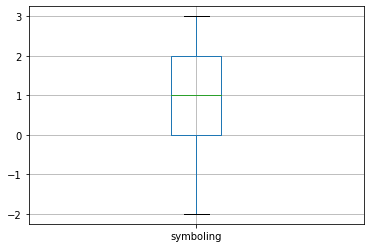

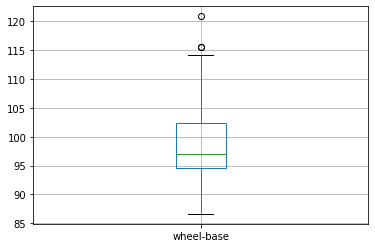

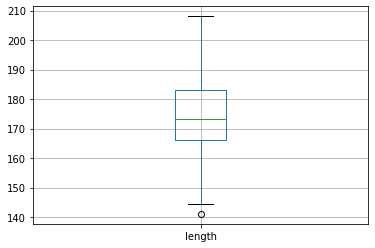

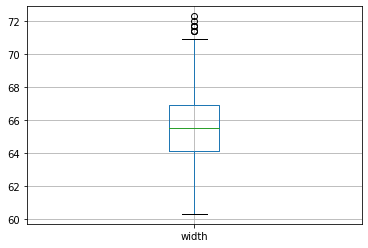

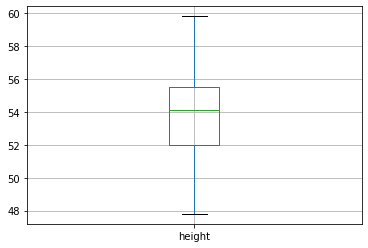

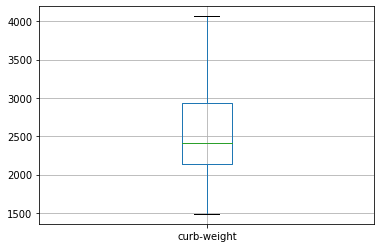

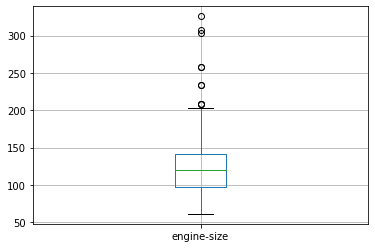

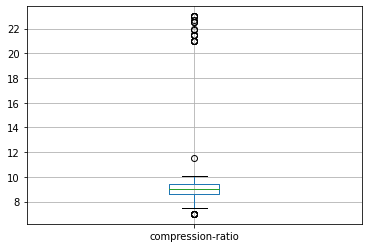

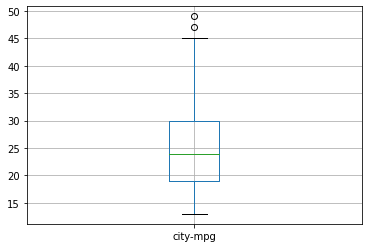

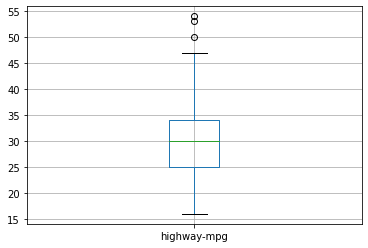

In [ ]:
# Handling numerical variables through Boxplot

#describe는 통계량이 있는 칼럼들만 나오기 때문에 숫자형 피쳐들만 나올 수 있게 할 수 있음. 

for i in df.describe().columns:
    df[[i]].boxplot()
    plt.show()

### Tukey Fences

- **Tukey Fences**는 **사분위 범위**(IQR, interquartile range)를 기반으로 한다.<br><br>
- **IQR**은 세번째 사분위에서 첫번째 사분위를 뺀 값이며(IQR = Q3 - Q1) 이다.<br><br>
아래 그림은 짝수와 홀수 값을 가진 데이터셋의 IQR를 구하는 과정이다<br>



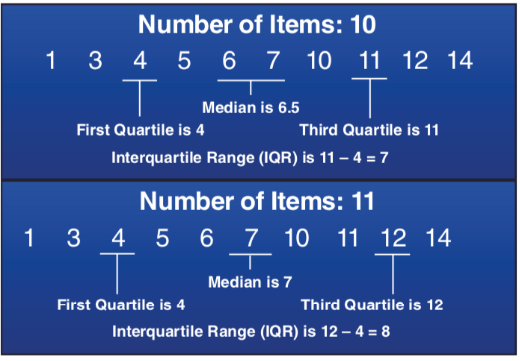

Tukey Fence에선 아래 두 가지로 이상치를 판단한다.
- Q1 - (1.5 * IQR) 미만
- Q3 + (1.5 * IQR) 초과

In [ ]:
def find_outlier_by_Tukey(data):
    q1, q3 = np.percentile(data,[25,75])
    iqr = q3-q1
    
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    print(f'lower_bound는 {lower_bound.round(3)}, upper_bound는 {upper_bound.round(3)} 입니다')
    
    # np.where은 데이터의 인덱스를 반환
    mask = np.where((data>upper_bound) | (data<lower_bound)) 
    return mask

In [ ]:
# example
x = np.random.randn(1000)
find_outlier_by_Tukey(x)

lower_bound는 -2.695, upper_bound는 2.647 입니다


(array([ 17, 181, 245, 532, 717, 750, 836, 926]),)

In [ ]:
# np.where과 DF.index 비교

def find_outlier_by_Tukey_DF(data):
    q1, q3 = np.percentile(data,[25,75])
    iqr = q3-q1
    
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    print(f'lower_bound는 {lower_bound.round(3)}, upper_bound는 {upper_bound.round(3)} 입니다')
    
    # np.where을 Dataframe.index로 바꿔서 쓸 수도 있다
    mask = data[(data['feature'] > upper_bound) | (data['feature'] < lower_bound)].index
    return mask

x_df = pd.DataFrame(x, columns=['feature'])
find_outlier_by_Tukey_DF(x_df)

lower_bound는 -2.695, upper_bound는 2.647 입니다


Int64Index([17, 181, 245, 532, 717, 750, 836, 926], dtype='int64')

In [ ]:
# 이상치 확인
x[find_outlier_by_Tukey(x)]

lower_bound는 -2.695, upper_bound는 2.647 입니다


array([-2.79858911, -3.23105501,  2.95862545, -2.78811288,  3.57157922,
       -2.7944723 ,  2.76660307, -3.16705533])

### Z-score(표준점수)

- **표준점수** = (데이터 포인트 - 데이터의 평균)/ 데이터의 표준편차<br><br>

- 표준점수를 구하면 변환한 데이터 **평균값이 0**이 되고 **표준편차는 1**이 된다.<br><br>

- 해석
    - Z-Score = 0 => 데이터 포인트가 중간(평균이다)
    - Z-Score = 1 => 데이터 포인트가 평균보다 1 표준편차가 높다<br>
    - Z-score의 값이 **3보다 크거나 -3보다 작은 것**은 **이상치**라고 판단할 수 있다.

In [ ]:
def find_outlier_z(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)
    
    z_score = [(y-mean)/std for y in data]

    masks = np.where(np.abs(z_score)>threshold)
    
    return masks

In [ ]:
x[find_outlier_z(x)]

array([-3.23105501,  2.95862545,  3.57157922, -3.16705533])

## 이상치 처리
### 단순삭제

- 이상값이 **Human error**에 의해서 발생한 경우에는 해당 관측치를 **삭제**하면 됩니다. <br>
- 단순 오타나, 주관식 설문 등의 비현실적인 응답, 데이터 처리 과정에서의 오류 등의 경우에 사용합니다.

### 다른 값으로 대체

- 절대적인 관측치의 **숫자가 작은 경우**, 단순삭제를 통해 이상치를 제거하면 관측치의 절대량이 작아지는 문제가 발생합니다.<br>
- 이런 경우 이상값이 Human error에 의해 발생했더라도 관측치를 삭제하는 대신 다른 값(평균 등)으로 **대체**하거나, 결측값과 유사하게 다른 변수들을 사용해서 예측 모델을 만들고, 이상값을 **예측**한 후 해당 값으로 대체하는 방법도 사용할 수 있습니다.

### 변수화

- 이상값이 **자연 발생**한 경우, 단순 삭제나 대체의 방법을 통해 수립된 모델은 설명/예측하고자 하는 현상을 잘 설명하지 못할 수도 있습니다. 
    - 예를 들어, 아래 그래프에서 다른 관측치들만 보면 경력과 연봉이 비례하는 현상이 존재하는 것 처럼 보이지만, 5년차의 연봉 $35,000인 이상치가 포함됨으로써 모델의 설명력이 크게 낮아 집니다. <br><br>    
- 자연발생적인 이상값의 경우, 바로 삭제하지 말고 좀 더 찬찬히 이상값에 대해 **파악**하는 것이 중요합니다.
    - 예를 들어, 위 이상값의 경우 의사 등 전문직종에 종사하는 사람이라고 가정해 봅시다. 이럴 경우 전문직종 종사 여부를 Yes – No로 변수화 하면 이상값을 삭제하지 않고 모델에 포함시킬 수 있습니다.




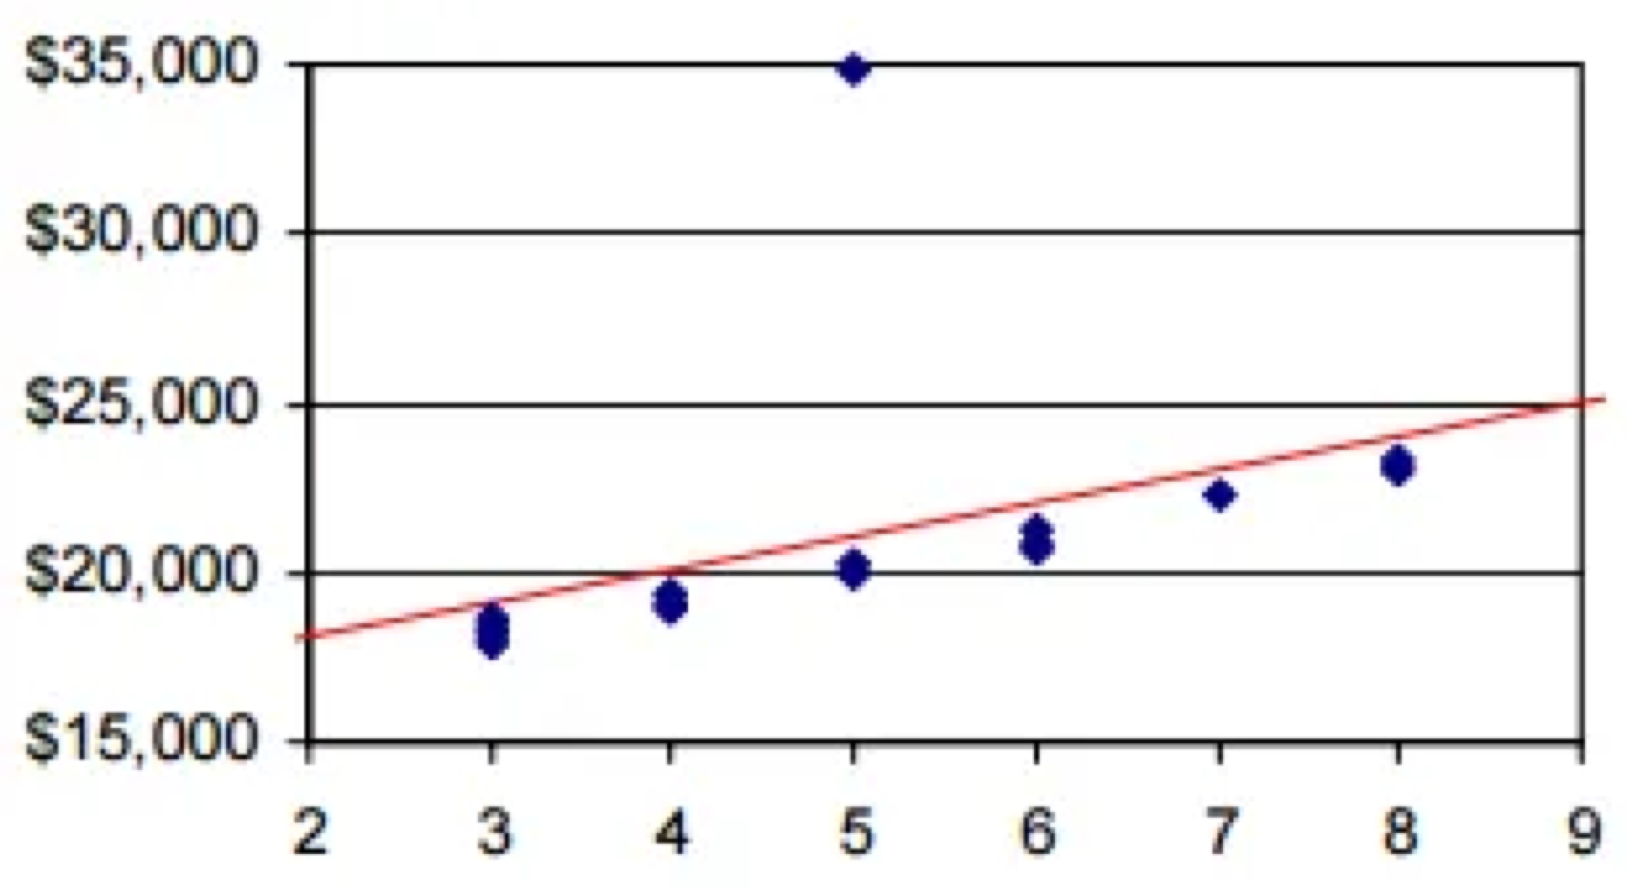

### 리샘플링
- 자연발생한 이상값을 처리하는 또 다른 방법으로는 해당 **이상값을 분리**해서 모델을 만드는 방법이 있습니다.
    - 아래와 같이 15년 이상의 경력을 가진 이상값이 존재한다고 가정해 봅시다. 이 관측치는 경력은 길지만 연봉이 비례해서 늘어나지 않은 사람입니다.
(위 사례와의 차이:
위 사례는 설명 변수, 즉 경력 측면에서는 Outlier가 아니고, 종속 변수인 연봉만 예측치를 벗어나는 반면, 본 케이스는 설명 변수, 종속 변수 모두에서 Outlier라는 점입니다.)


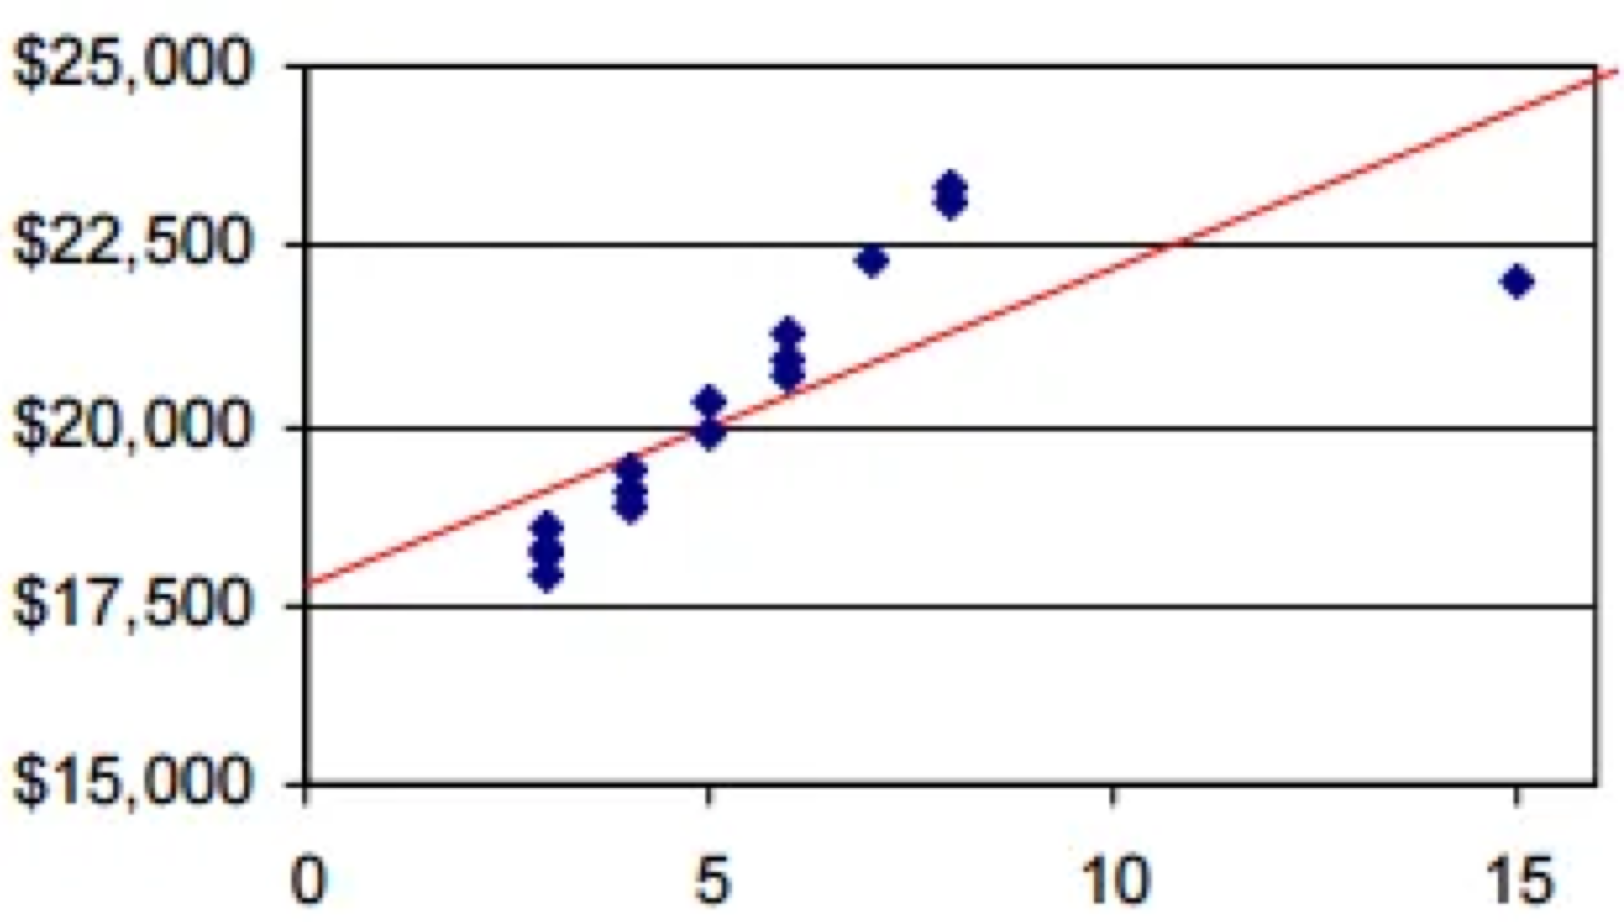

### 케이스를 분리하여 분석
- 위와 동일한 사례에서 실은 경력이 지나치게 길어질 경우 연봉이 낮아지는 현상이 실제로 발생할 수도 있습니다. (건강상의 이유 등으로)<br>
- 이 경우, 이상값을 대상에서 제외시키는 것은 현상에 대한 정확한 설명이 되지 않을 수 있습니다.<br>보다 좋은 방법은 이상값을 포함한 모델과 제외한 **모델을 모두 만들고** 각각의 모델에 대한 설명을 다는 것입니다.<br>
- 자연발생한 이상값에 별다른 특이점이 발견되지 않는다면, 단순 제외 보다는 케이스를 분리하여 분석하는 것을 추천합니다.

# `단계 4` - **Feature Engineering**

- **Feature Engineering**이란, **기존**의 변수를 사용해서 데이터에 **정보를 추가**하는 일련의 과정입니다.<br>새로 관측치나 변수를 추가하지 않고도 기존의 데이터를 보다 **유용**하게 만드는 방법론입니다.






In [23]:
data = pd.read_csv("./penguins_size_modified1.csv")
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.3+ KB


In [25]:
data = data.astype({'species':'category','island':'category','sex':'category'})

print(data.dtypes)
display(data)

species              category
island               category
culmen_length_mm      float64
culmen_depth_mm       float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
dtype: object


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## DUMMY
- Binning 과는 반대로 **범주형 변수를 연속형 변수로 변환**하기 위해 사용합니다. 사용하고자 하는 분석 방법론에서 필요한 경우에 주로 사용합니다.

In [27]:
categorical_data = data[['species','island','sex']]
categorical_data_copy = categorical_data.copy()
categorical_data

,species,island,sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
3,Adelie,Torgersen,FEMALE
4,Adelie,Torgersen,MALE
...,...,...,...
328,Gentoo,Biscoe,FEMALE
329,Gentoo,Biscoe,FEMALE
330,Gentoo,Biscoe,MALE
331,Gentoo,Biscoe,FEMALE


In [28]:
# Label encoding
categorical_data["species_cat"] = categorical_data["species"].cat.codes
print(categorical_data["species_cat"])
print('-----------------------------------------------')
print(categorical_data['species_cat'].dtype)

0      0
1      0
2      0
3      0
4      0
      ..
328    2
329    2
330    2
331    2
332    2
Name: species_cat, Length: 333, dtype: int8
-----------------------------------------------
int8


In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le = le.fit(categorical_data_copy['species'])
categorical_data_copy['species_cat'] = le.transform(categorical_data_copy['species'])
print(categorical_data_copy['species_cat'])
print('-----------------------------------------------')
print(categorical_data_copy['species_cat'].dtype)
del categorical_data_copy

0      0
1      0
2      0
3      0
4      0
      ..
328    2
329    2
330    2
331    2
332    2
Name: species_cat, Length: 333, dtype: int32
-----------------------------------------------
int32


In [30]:
print(categorical_data['species'].value_counts())
print()
print(categorical_data['species_cat'].value_counts())

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

0    146
2    119
1     68
Name: species_cat, dtype: int64


- cat.codes는 범주형 변수로 변환해주는 코드
- 사이킷런의 Label_encoder()를 이용할 수도 있음

- https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.codes.html

In [31]:
# One hot encoding == DUMMY

encoded_spicies = pd.get_dummies(categorical_data['species'])
encoded_island = pd.get_dummies(categorical_data['island'])
encoded_sex = pd.get_dummies(categorical_data['sex'])

categorical_data = categorical_data.join(encoded_spicies)
categorical_data = categorical_data.join(encoded_island)
categorical_data = categorical_data.join(encoded_sex)

In [ ]:
categorical_data

,species,island,sex,species_cat,Adelie,Chinstrap,Gentoo,Biscoe,Dream,Torgersen,FEMALE,MALE
0,Adelie,Torgersen,MALE,0,1,0,0,0,0,1,0,1
1,Adelie,Torgersen,FEMALE,0,1,0,0,0,0,1,1,0
2,Adelie,Torgersen,FEMALE,0,1,0,0,0,0,1,1,0
3,Adelie,Torgersen,FEMALE,0,1,0,0,0,0,1,1,0
4,Adelie,Torgersen,MALE,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,FEMALE,2,0,0,1,1,0,0,1,0
329,Gentoo,Biscoe,FEMALE,2,0,0,1,1,0,0,1,0
330,Gentoo,Biscoe,MALE,2,0,0,1,1,0,0,0,1
331,Gentoo,Biscoe,FEMALE,2,0,0,1,1,0,0,1,0


In [ ]:
categorical_data1 = pd.get_dummies(categorical_data, columns = ['species','island','sex'])
categorical_data1

,species_cat,Adelie,Chinstrap,Gentoo,Biscoe,Dream,Torgersen,FEMALE,MALE,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1
1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0
2,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0
3,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0
4,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,2,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0
329,2,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0
330,2,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,1
331,2,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0


### 실습3

In [32]:
df_ex3 = data[['species','island','sex']]
df_ex3

,species,island,sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
3,Adelie,Torgersen,FEMALE
4,Adelie,Torgersen,MALE
...,...,...,...
328,Gentoo,Biscoe,FEMALE
329,Gentoo,Biscoe,FEMALE
330,Gentoo,Biscoe,MALE
331,Gentoo,Biscoe,FEMALE


In [33]:
# island를 label 인코딩하고, 성별을 더미변수로 표현하기
df_ex3["island"] = df_ex3["island"].cat.codes
df_ex3 = pd.get_dummies(df_ex3, columns = ['sex'])


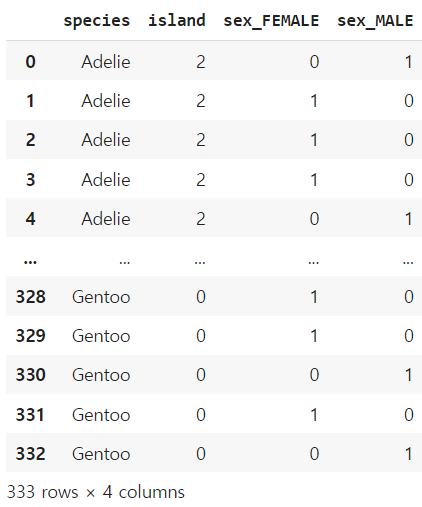

## Scaling
- 변수의 **단위를 변경**하고 싶거나, 변수의 **분포가 편향**되어 있을 경우, 변수 간의 관계가 잘 드러나지 않는 경우에는 변수 변환의 방법을 사용합니다.<br>

- 가장 자주 사용하는 방법으로는 Log 함수가 있고, 유사하지만 좀 덜 자주 사용되는 Square root를 취하는 방법도 있습니다.

참고 : https://homeproject.tistory.com/entry/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%8A%A4%EC%BC%80%EC%9D%BC%EB%A7%81-Data-Scaling

### StandardScaler
- 각 feature의 평균을 0, 분산을 1로 변경합니다. 모든 특성들이 **같은 스케일**을 갖게 됩니다.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer, RobustScaler

scaled_data = data[['body_mass_g']]

standard_scaler = StandardScaler()
scaled_data['body_mass_scaled'] = standard_scaler.fit_transform(scaled_data[['body_mass_g']])

print('Mean:', scaled_data['body_mass_scaled'].mean())
print('Standard Deviation:', scaled_data['body_mass_scaled'].std())

Mean: -1.70700957539964e-16
Standard Deviation: 1.0015048917468006


In [ ]:
scaled_data

,body_mass_g,body_mass_scaled
0,3750.0,-0.568475
1,3800.0,-0.506286
2,3250.0,-1.190361
3,3450.0,-0.941606
4,3650.0,-0.692852
...,...,...
328,4925.0,0.892957
329,4850.0,0.799674
330,5750.0,1.919069
331,5200.0,1.234995


### MinMaxScaler
- 모든 feature가 **0과 1사이에 위치**하게 만듭니다.<br>
데이터가 2차원 셋일 경우, 모든 데이터는 x축의 0과 1 사이에, y축의 0과 1사이에 위치하게 됩니다.

In [ ]:
minmax_scaler = MinMaxScaler()
scaled_data['body_mass_min_max_scaled'] = minmax_scaler.fit_transform(scaled_data[['body_mass_g']])

print('Mean:', scaled_data['body_mass_min_max_scaled'].mean())
print('Standard Deviation:', scaled_data['body_mass_min_max_scaled'].std())

Mean: 0.41862696029362695
Standard Deviation: 0.22367105609524904


### RobustScaler
- 모든 특성들이 **같은 크기**를 갖는다는 점에서 StandardScaler와 비슷하지만, 평균과 분산 대신 **median과 quartile**을 사용합니다.
- RobustScaler는 이상치에 영향을 받지 않습니다.

In [ ]:
robust_scaler = RobustScaler()
scaled_data['body_mass_robust_scaled'] = robust_scaler.fit_transform(scaled_data[['body_mass_g']])

print('Mean:', scaled_data['body_mass_robust_scaled'].mean())
print('Standard Deviation:', scaled_data['body_mass_robust_scaled'].std())

Mean: 0.12820984249555675
Standard Deviation: 0.6573190219942012


In [ ]:
scaled_data

,body_mass_g,body_mass_scaled,body_mass_min_max_scaled,body_mass_robust_scaled
0,3750.0,-0.568475,0.291667,-0.244898
1,3800.0,-0.506286,0.305556,-0.204082
2,3250.0,-1.190361,0.152778,-0.653061
3,3450.0,-0.941606,0.208333,-0.489796
4,3650.0,-0.692852,0.263889,-0.326531
...,...,...,...,...
328,4925.0,0.892957,0.618056,0.714286
329,4850.0,0.799674,0.597222,0.653061
330,5750.0,1.919069,0.847222,1.387755
331,5200.0,1.234995,0.694444,0.938776


### QuantileTransformer
- feature가 uniform distribution을 따르도록 scale합니다.
- RobustScaler처럼 이상치에 영향을 받지 않습니다.

참고 : https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

In [ ]:
qtrans = QuantileTransformer()
scaled_data['body_mass_q_trans_uniform'] = qtrans.fit_transform(scaled_data[['body_mass_g']])

print('Mean:', scaled_data['body_mass_q_trans_uniform'].mean())
print('Standard Deviation:', scaled_data['body_mass_q_trans_uniform'].std())

Mean: 0.49970150873765334
Standard Deviation: 0.2900598005184906


In [ ]:
scaled_data

,body_mass_g,body_mass_scaled,body_mass_min_max_scaled,body_mass_robust_scaled,body_mass_q_trans_uniform
0,3750.0,-0.568475,0.291667,-0.244898,0.355422
1,3800.0,-0.506286,0.305556,-0.204082,0.393072
2,3250.0,-1.190361,0.152778,-0.653061,0.087349
3,3450.0,-0.941606,0.208333,-0.489796,0.183735
4,3650.0,-0.692852,0.263889,-0.326531,0.292169
...,...,...,...,...,...
328,4925.0,0.892957,0.618056,0.714286,0.787651
329,4850.0,0.799674,0.597222,0.653061,0.766566
330,5750.0,1.919069,0.847222,1.387755,0.966867
331,5200.0,1.234995,0.694444,0.938776,0.847892


### 실습4

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target,  random_state= 1422)

In [ ]:
# X_train과 X_test를 StandardScaler 스케일러로 스케일링 하기
# 스케일링한 X_train과 X_test의 변수명은 각각 X_train_scale, X_test_scale로 한다


In [ ]:
# 스케일링 하는 이유확인
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
print("test accuracy before scaling : %0.3f" %(svc.score(X_test, y_test)))

svc.fit(X_train_scale, y_train)
print("test accuracy after scaling : %0.3f" %(svc.score(X_test_scale, y_test)))

test accuracy before scaling : 0.902
test accuracy after scaling : 0.958


#### (참고)Normalizer
StandardScaler, RobustScaler, MinMaxScaler가 각 columns의 통계치를 이용한다면 Normalizer는 row마다 각각 정규화됩니다. Normalizer는 유클리드 거리가 1이 되도록 데이터를 조정합니다. (유클리드 거리는 두 점 사이의 거리를 계산할 때 쓰는 방법, L2 Distance)

## BINNING
- **연속형 변수를 범주형 변수로** 만드는 방법입니다. 
    - 예를 들어, 연봉 데이터가 수치로 존재하는 경우, 이를 100만원 미만, 101만원~200만원.. 하는 식으로 범주형 변수로 변환하는 것이죠.<br><br>

- Binning에는 특별한 원칙이 있는 것이 아니기 때문에, 분석가의 Business 이해도에 따라 창의적인 방법으로 Binning 할 수 있습니다.


In [ ]:
# 0-40 low / 40-50 medium / 50-100 high
bin_data = data[['culmen_length_mm']]
bin_data['culmen_length_bin'] = pd.cut(data['culmen_length_mm'], bins=[0, 40, 50, 100], labels=["Low", "Mid", "High"])
bin_data

,culmen_length_mm,culmen_length_bin
0,39.1,Low
1,39.5,Low
2,40.3,Mid
3,36.7,Low
4,39.3,Low
...,...,...
328,47.2,Mid
329,46.8,Mid
330,50.4,High
331,45.2,Mid


## Transform
- 기존 존재하는 변수의 성질을 이용해 **다른 변수**를 만드는 방법입니다.
    - 예를 들어, 날짜 별 판매 데이터가 있다면 날짜 변수를 주중/주말로 나눈 변수를 추가한다든지, 여행지의 방문객 데이터의 경우 해당 일에 방문객 증감 여부 등을 추가하는 것이지요.<br><br>

- Transform에도 특별한 원칙이 있는 것은 아니며, 분석가의 Business 이해도에 따라 다양한 변수가 생성될 수 있습니다.


### LogTransform

In [ ]:
log_data = data[['body_mass_g']]
log_data['body_mass_log'] = (data['body_mass_g'] + 1).transform(np.log) #log0은 없기 때문에 1을 더해서 해야함 
log_data

,body_mass_g,body_mass_log
0,3750.0,8.229778
1,3800.0,8.243019
2,3250.0,8.086718
3,3450.0,8.146419
4,3650.0,8.202756
...,...,...
328,4925.0,8.502283
329,4850.0,8.486940
330,5750.0,8.657129
331,5200.0,8.556606


In [ ]:
log1p_data = data[['body_mass_g']]
log1p_data['body_mass_log1p'] = (data['body_mass_g']).transform(np.log1p)
log1p_data

,body_mass_g,body_mass_log1p
0,3750.0,8.229778
1,3800.0,8.243019
2,3250.0,8.086718
3,3450.0,8.146419
4,3650.0,8.202756
...,...,...
328,4925.0,8.502283
329,4850.0,8.486940
330,5750.0,8.657129
331,5200.0,8.556606


##  (참고)반복문을 통한 데이터 처리 - for문은 피하고, 열단위의 연산을 하자!
- for문과 if문을 활용한 데이터 처리
- for문은 행단위의 처리 → 연산이 비효율적 → 기피해야함.
- <span class="mark"> 열단위의 연산이 훨씬 빠르고 효율적임.</span>

In [ ]:
df = pd.read_csv("./aug_train.csv")

In [ ]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


### for문 과 if문을 활용한 경우

In [ ]:
%%time
# education_level이 Graduate이고, Has relevent experience이면 'gbn', 
# education_level이 Graduate이고, No relevent exprience이면 "mbn"
# 그외엔 'Unknown'이라는 칼럼 'check' 만들고자 함.
for i in range(len(df)):
    if (df.loc[i,'education_level']=="Graduate") & (df.loc[i,'relevent_experience']=='Has relevent experience'):
        df.loc[i,'check'] = 'gbn'
    elif (df.loc[i,'education_level']=="Graduate") & (df.loc[i,'relevent_experience']=="No relevent experience"):
        df.loc[i,'check'] = 'mbn'
    else:
        df.loc[i,'check'] = 'Unknown' 

CPU times: user 12.7 s, sys: 528 ms, total: 13.2 s
Wall time: 12.4 s


In [ ]:
df['check'].value_counts()

gbn        8898
Unknown    7560
mbn        2700
Name: check, dtype: int64

### 같은 목표를 열단위로 처리하는 경우

In [ ]:
df = pd.read_csv("./aug_train.csv")

In [ ]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [ ]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
gbn= list(df[(df['education_level']=='Graduate')&(df['relevent_experience']=='Has relevent experience')].index)

In [ ]:
df.loc[gbn,'check'] = 'gbn'

In [ ]:
mbn= list(df[(df['education_level']=='Graduate')&(df['relevent_experience']=='No relevent experience')].index)
df.loc[mbn,'check'] = 'mbn'

In [ ]:
# 지정이 안된 값들은 NaN값으로 되어 있으므로, 이를 'Unknown'으로 채워줌
df['check'] = df['check'].fillna('Unknown')

In [ ]:
df['check'].value_counts()

gbn        8898
Unknown    7560
mbn        2700
Name: check, dtype: int64

In [ ]:
%%time 
# lambda보다 빠름.
# 처리 시간을 비교하기위해 위의 연산을 한꺼번에 했을 경우 시간 보기
gbn= list(df[(df['education_level']=='Graduate')&(df['relevent_experience']=='Has relevent experience')].index)
mbn= list(df[(df['education_level']=='Graduate')&(df['relevent_experience']=='No relevent experience')].index)
df.loc[gbn,'check'] = 'gbn'
df.loc[mbn,'check'] = 'mbn'
df['check'] = df['check'].fillna('Unknown')

CPU times: user 19.3 ms, sys: 0 ns, total: 19.3 ms
Wall time: 20 ms
